 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [158]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [159]:
whale_returns_data = Path("whale_returns.csv", index_col = "Date", parse_dates=True)
whale_returns = pd.read_csv(whale_returns_data)
whale_returns.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [160]:
# Lets understand data
# count null
whale_returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         1060 non-null   object 
 1   SOROS FUND MANAGEMENT LLC    1059 non-null   float64
 2   PAULSON & CO.INC.            1059 non-null   float64
 3   TIGER GLOBAL MANAGEMENT LLC  1059 non-null   float64
 4   BERKSHIRE HATHAWAY INC       1059 non-null   float64
dtypes: float64(4), object(1)
memory usage: 41.5+ KB


In [161]:
# Count nulls
whale_returns.count()

Date                           1060
SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [162]:
# Drop nulls
whale_returns.dropna()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [163]:
whale_returns = whale_returns.set_index(pd.to_datetime(whale_returns["Date"], infer_datetime_format=True))
whale_returns.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,
2015-03-02,2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [164]:
whale_returns.drop(columns=["Date"], inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [165]:
# Reading algorithmic returns
algo_returns_data = Path("algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_data)
algo_returns.head()

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [166]:
# Count nulls
algo_returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1241 entries, 0 to 1240
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1241 non-null   object 
 1   Algo 1  1241 non-null   float64
 2   Algo 2  1235 non-null   float64
dtypes: float64(2), object(1)
memory usage: 29.2+ KB


In [167]:
# Drop nulls
algo_returns.dropna()

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [168]:
algo_returns = algo_returns.set_index(pd.to_datetime(algo_returns["Date"], infer_datetime_format=True))
algo_returns.head()

,Date,Algo 1,Algo 2
Date,,,
2014-05-28,2014-05-28,0.001745,NaN
2014-05-29,2014-05-29,0.003978,NaN
2014-05-30,2014-05-30,0.004464,NaN
2014-06-02,2014-06-02,0.005692,NaN
2014-06-03,2014-06-03,0.005292,NaN


In [169]:
algo_returns.drop(columns=["Date"], inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [170]:
algo_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1241 entries, 2014-05-28 to 2019-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Algo 1  1241 non-null   float64
 1   Algo 2  1235 non-null   float64
dtypes: float64(2)
memory usage: 29.1 KB


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [171]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history_data = Path("sp_tsx_history.csv", index_col ="Date", parse_dates=True)
sp_tsx_history= pd.read_csv(sp_tsx_history_data)
sp_tsx_history.head()

,Date,Close
0,1-Oct-2012,"$12,370.19"
1,2-Oct-2012,"$12,391.23"
2,3-Oct-2012,"$12,359.47"
3,4-Oct-2012,"$12,447.68"
4,5-Oct-2012,"$12,418.99"


In [172]:
# Check Data Types
sp_tsx_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1818 entries, 0 to 1817
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    1818 non-null   object
 1   Close   1818 non-null   object
dtypes: object(2)
memory usage: 28.5+ KB


In [173]:
# Fix Data Types
sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace("$","")
sp_tsx_history

<ipython-input-173-8cd04dabc60d>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace("$","")


,Date,Close
0,1-Oct-2012,"12,370.19"
1,2-Oct-2012,"12,391.23"
2,3-Oct-2012,"12,359.47"
3,4-Oct-2012,"12,447.68"
4,5-Oct-2012,"12,418.99"
...,...,...
1813,20-Dec-2019,"17,118.44"
1814,23-Dec-2019,"17,128.71"
1815,24-Dec-2019,"17,180.15"
1816,27-Dec-2019,"17,168.21"


In [174]:
sp_tsx_history['Close'] = sp_tsx_history['Close'].str.replace(",","")
sp_tsx_history

,Date,Close
0,1-Oct-2012,12370.19
1,2-Oct-2012,12391.23
2,3-Oct-2012,12359.47
3,4-Oct-2012,12447.68
4,5-Oct-2012,12418.99
...,...,...
1813,20-Dec-2019,17118.44
1814,23-Dec-2019,17128.71
1815,24-Dec-2019,17180.15
1816,27-Dec-2019,17168.21


In [175]:
sp_tsx_history['Close'] = sp_tsx_history['Close'].astype('float')
sp_tsx_history.dtypes

Date      object
Close    float64
dtype: object

In [176]:
# rename column from 'close' to 'daily returns'
sp_tsx_history = sp_tsx_history.rename(columns={'Close' : 'sp_returns'})
sp_tsx_history

,Date,sp_returns
0,1-Oct-2012,12370.19
1,2-Oct-2012,12391.23
2,3-Oct-2012,12359.47
3,4-Oct-2012,12447.68
4,5-Oct-2012,12418.99
...,...,...
1813,20-Dec-2019,17118.44
1814,23-Dec-2019,17128.71
1815,24-Dec-2019,17180.15
1816,27-Dec-2019,17168.21


In [177]:
sp_tsx_history = sp_tsx_history.set_index(pd.to_datetime(sp_tsx_history["Date"], infer_datetime_format=True))
sp_tsx_history.head()

,Date,sp_returns
Date,,
2012-10-01,1-Oct-2012,12370.19
2012-10-02,2-Oct-2012,12391.23
2012-10-03,3-Oct-2012,12359.47
2012-10-04,4-Oct-2012,12447.68
2012-10-05,5-Oct-2012,12418.99


In [178]:
sp_tsx_history.drop(columns=["Date"])

,sp_returns
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [179]:
sp_tsx_history.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1818 entries, 2012-10-01 to 2019-12-30
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1818 non-null   object 
 1   sp_returns  1818 non-null   float64
dtypes: float64(1), object(1)
memory usage: 42.6+ KB


In [180]:
sp_tsx_history.dtypes

Date           object
sp_returns    float64
dtype: object

In [181]:
sp_tsx_history.isnull().sum()

Date          0
sp_returns    0
dtype: int64

In [182]:
# Drop nulls
sp_tsx_history.drop(columns=["Date"], inplace=True)

In [183]:
# Calculate daily returns
sp_returns = (sp_tsx_history - sp_tsx_history.shift(1)) / sp_tsx_history.shift(1)
sp_returns.head()

,sp_returns
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


###### Combine Whale, Algorithmic, and S&P TSX 60 Returns

---

In [184]:
data_set = pd.merge(left=whale_returns, right=algo_returns, left_index=True, right_index=True)
portfolio = pd.merge(left=new_data, right = sp_returns, left_index=True, right_index=True)
portfolio.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_returns
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.001950
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

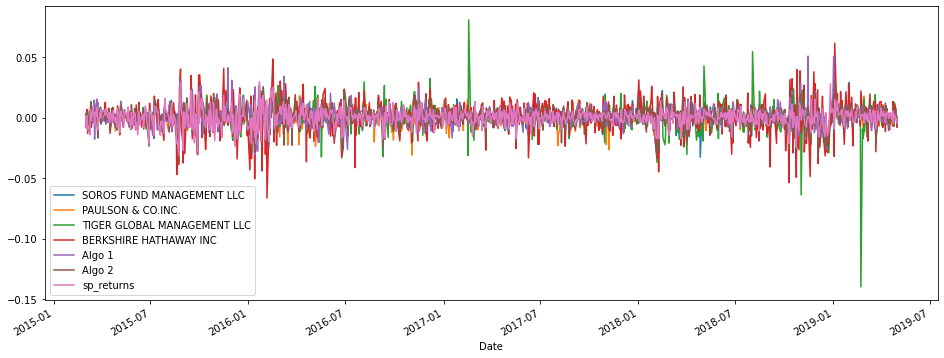

In [185]:
# Plot daily returns of all portfolios
portfolio.plot(figsize=(16,6))

#### Calculate and Plot cumulative returns.

In [186]:
# Calculate cumulative returns of all portfolios
cumulative_returns_portfolio = (1 + portfolio).cumprod()
cumulative_returns_portfolio.head()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_returns
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,0.991842,1.003200,1.001950
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.989916,1.002247,0.993404
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.981414,1.004669,0.990055
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.980476,1.009012,0.991386
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.975616,0.997449,0.981500


<AxesSubplot:xlabel='Date'>

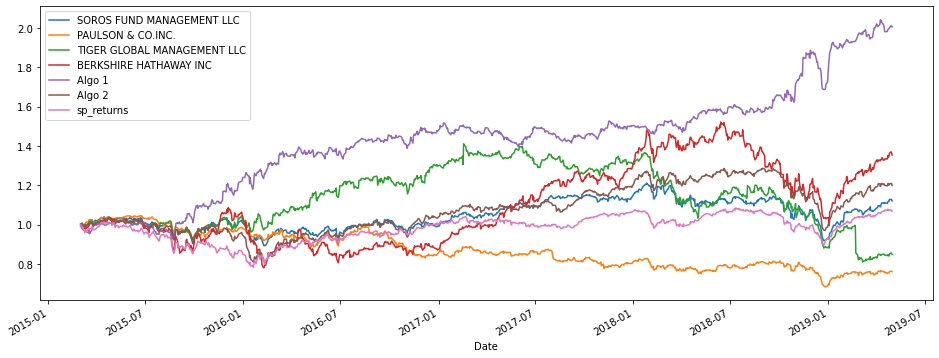

In [187]:
# Plot cumulative returns
cumulative_returns_portfolio.plot(figsize=(16,6))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


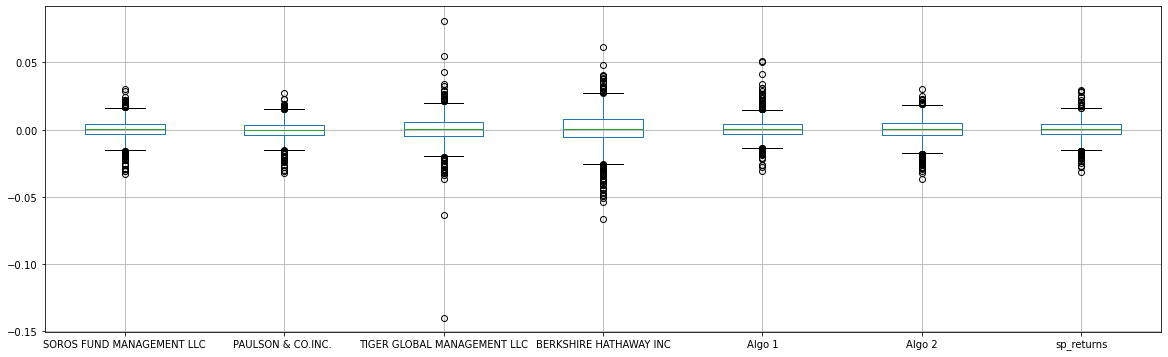

In [188]:
# Box plot to visually show risk
boxplot = portfolio.boxplot(column=['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ','TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2', 'sp_returns'], figsize=(20,6))

### Calculate Standard Deviations

In [189]:
# Calculate the daily standard deviations of all portfolios
portfolio_std = portfolio.std()
portfolio_std.head(7)

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007590
Algo 2                         0.008323
sp_returns                     0.007031
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [190]:
# Calculate  the daily standard deviation of S&P TSX 60
# S&P TSX has a std 0.007031
# Determine which portfolios are riskier than the S&P TSX 60
# SOROS FUND MANAGEMENT LLC, TIGER GLOBAL MANAGEMENT LLC, BERKSHIRE HATHAWAY INC, Algo 1 and Algo 2 are all riskier than the S&P TSX 60

### Calculate the Annualized Standard Deviation

In [191]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = portfolio_std * np.sqrt(252)
annualized_std.head(7)

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120491
Algo 2                         0.132121
sp_returns                     0.111613
dtype: float64

---

###### Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

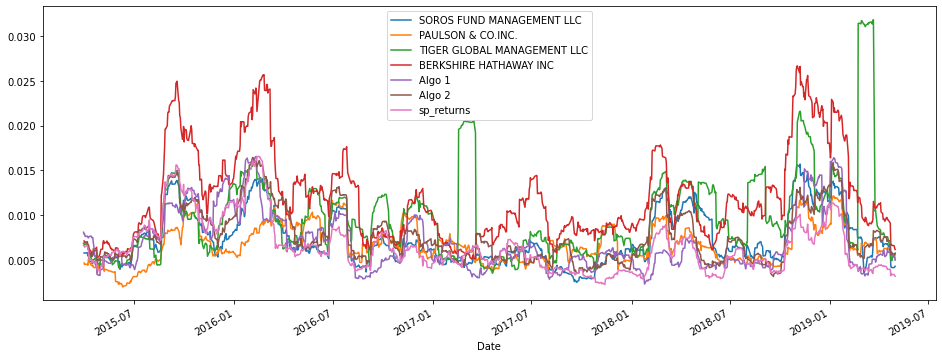

In [204]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
portfolio.rolling(window=21).std().plot(figsize=(16,6))



### Calculate and plot the correlation

In [199]:
# Calculate the correlation
correlation = portfolio.corr()
correlation
# Algo 2 has the strongest correlation to the S&P TSX 


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_returns
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.284840,0.309759
Algo 2,0.826667,0.674015,0.506689,0.684609,0.284840,1.000000,0.737391
sp_returns,0.673930,0.486511,0.440583,0.557250,0.309759,0.737391,1.000000


<AxesSubplot:>

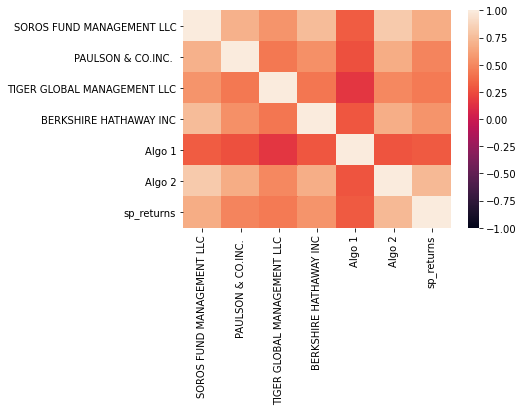

In [200]:
# Display de correlation matrix
import seaborn as sns
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [207]:
# Calculate variance of S&P TSX
variance = portfolio['sp_returns'].var()
variance


4.943480253016116e-05

In [209]:
# Calculate covariance of a single portfolio
covariance = portfolio['Algo 1'].cov(portfolio['sp_returns'])
covariance

1.6530854432333154e-05

In [210]:
# Computing beta
Algo1_beta = covariance / variance
Algo1_beta
# So compared to the market movement, Algo 1 will move by only 33.44% of the market increase or decrease so the volatility for this stock is small

0.33439709650397303

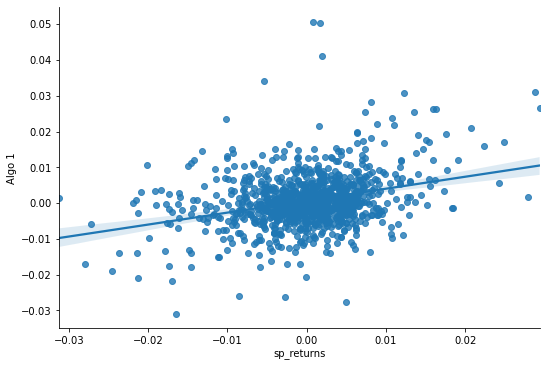

In [212]:
# Plot beta trend
sns.lmplot(x='sp_returns', y='Algo 1', data=portfolio, aspect=1.5, fit_reg=True)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [ ]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [215]:
# Annualized Sharpe Ratios
sharpe_ratios = (portfolio.mean() * 252) / (portfolio_std * np.sqrt(252))
sharpe_ratios.head()

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.473237
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

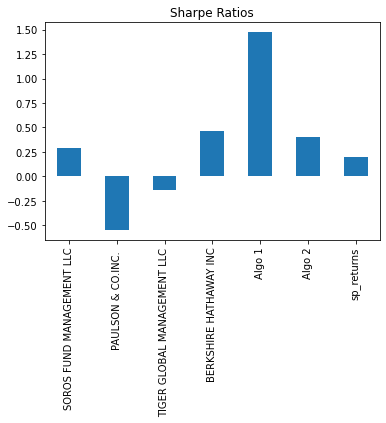

In [216]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title="Sharpe Ratios")

In [ ]:
# Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

# There are a few porfolios that wil be more attractive to investors and have a greater risk adjusted performance against the S&P TSX 60. Porfolios such as Soros fund management, Algo 1 and Algo 2 will bear better returns relative to their risk that the S&P TSX 60.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P TSX 60 index.

* `SHOP` - [Shopify Inc](https://en.wikipedia.org/wiki/Shopify)

* `OTEX` - [Open Text Corporation](https://en.wikipedia.org/wiki/OpenText)

* `L` - [Loblaw Companies Limited](https://en.wikipedia.org/wiki/Loblaw_Companies)

In [ ]:
# Reading data from 1st stock


In [ ]:
# Reading data from 2nd stock


In [ ]:
# Reading data from 3rd stock


In [ ]:
# Combine all stocks in a single DataFrame


In [ ]:
# Reset Date index


In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!